In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
class Logistic_regression() :

    def __init__(self, lr = 0.01, n_itr = 10000) :
        self.lr = lr
        self.n_itr = n_itr
        self.cost_values = []
    
    def fit_model(self, X_train, y_train) :
        self.X_train = X_train
        self.y_train = y_train

        self.n_samples, self.n_features =X_train.shape
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        

        #Gradient Desent
        for _ in range(self.n_itr) :
            self.update_wb()
    
    def update_wb(self) :

        #Saving J value for current weights and bias
        self.cost_values.append(self.J_wb())

        #Calculating gradients
        preds = self.f_wb(self.X_train)
        dw = (1/self.n_samples) * np.dot( self.X_train.T, ( preds - self.y_train  ) )
        db = np.sum( preds -  self.y_train  )

        #Updating the weights and bias
        self.weights -= self.lr * dw
        self.bias -= self.lr * db


    
    #Predictions for current weights and bias
    def f_wb(self, X) :
        z = ( np.dot( X, self.weights ) + self.bias )
        return 1 / ( 1 +  np.exp( -z ) )

    #cost function for logistic regression
    def J_wb(self) :
        y_1 = np.dot( self.y_train, np.log(self.f_wb(self.X_train) + 1e-10) )
        y_0 = np.dot( (1 - self.y_train), np.log(1 - self.f_wb(self.X_train) + 1e-10) )
        return ( -1 / self.n_samples ) *  ( y_1 + y_0 )   

In [4]:
#IMPORTING DATA
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
572,0,3,Mr. George Patchett,male,19.0,0,0,14.5000
573,1,2,Miss. Ethel Garside,female,34.0,0,0,13.0000
574,1,1,Mrs. William Baird (Alice Munger) Silvey,female,39.0,1,0,55.9000
575,0,3,Mrs. Joseph (Maria Elias) Caram,female,18.0,1,0,14.4583


In [5]:
#Replacing the Sex feature with numbers, so that we can do the math  
#train = train.drop(['Name'], axis = 1)
train['Sex'].replace('male', 1, inplace = True)
train['Sex'].replace('female', 0, inplace = True)
test['Sex'].replace(['male', 'female'], [1, 0], inplace = True)


In [6]:
#Viewing Correlation to decide which features to select
train.corr()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.276214,-0.554878,-0.067122,-0.052236,0.081380,0.195291
Pclass,-0.276214,1.000000,0.112888,-0.391116,0.102602,-0.000851,-0.587374
Sex,-0.554878,0.112888,1.000000,0.096327,-0.087290,-0.185706,-0.171897
Age,-0.067122,-0.391116,0.096327,1.000000,-0.340080,-0.251442,0.106311
Siblings/Spouses Aboard,-0.052236,0.102602,-0.087290,-0.340080,1.000000,0.424492,0.173866
Parents/Children Aboard,0.081380,-0.000851,-0.185706,-0.251442,0.424492,1.000000,0.250306
Fare,0.195291,-0.587374,-0.171897,0.106311,0.173866,0.250306,1.000000


In [7]:
#FEATURE SELECTION

features = [
    'Pclass', 
    'Sex', 
    'Age', 
    'Siblings/Spouses Aboard',
    'Parents/Children Aboard', 
    'Fare'
    ]

print('Selected Features are ~\n', features)

#get X_train and y_train arrays

X_train = np.array( train.loc[:, features].values )
y_train = np.array( train.loc[:, 'Survived'].values )

X_test = np.array( test.loc[:, features].values )
y_test = np.array( test.loc[:, 'Survived'].values )

print('\nX_train - \n', X_train[:5])
print('\ny_train - \n', y_train[:5])
print('\n Shapes = ', X_train.shape, y_train.shape)

print('\nX_test - \n', X_test[:5])
print('\ny_test - \n', y_test[:5])
print('\n Shapes = ', X_test.shape, y_test.shape)


Selected Features are ~
 ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']

X_train - 
 [[ 3.      1.     22.      1.      0.      7.25  ]
 [ 1.      0.     38.      1.      0.     71.2833]
 [ 3.      0.     26.      0.      0.      7.925 ]
 [ 1.      0.     35.      1.      0.     53.1   ]
 [ 3.      1.     35.      0.      0.      8.05  ]]

y_train - 
 [0 1 1 1 0]

 Shapes =  (577, 6) (577,)

X_test - 
 [[  2.       0.      25.       1.       1.      30.    ]
 [  1.       0.      39.       1.       1.     110.8833]
 [  2.       1.      54.       0.       0.      26.    ]
 [  1.       1.      36.       0.       0.      40.125 ]
 [  3.       1.      16.       0.       0.       8.7125]]

y_test - 
 [1 1 0 0 0]

 Shapes =  (310, 6) (310,)


In [8]:
# FEATURE SCALLING

#print(X_train)
#print(X_train.T)
X_new=[]
for feature_list in X_train.T :
    feature_list = ( feature_list - feature_list.mean() ) / (feature_list.max() - feature_list.min()) 
    #print('Modified feature lis - \n', feature_list)
    X_new.append(feature_list)
X_train = np.array(X_new)
X_train = X_train.T

X_new=[]
for feature_list in X_test.T :
    feature_list = ( feature_list - feature_list.mean() ) / (feature_list.max() - feature_list.min()) 
    #print('Modified feature lis - \n', feature_list)
    X_new.append(feature_list)
X_test = np.array(X_new)
X_test = X_test.T

print('\nX_train = \n', np.round(X_train, 5))
print('\n X_test = \n', np.round(X_test, 5))


X_train = 
 [[ 0.34489  0.37608 -0.10443  0.05654 -0.07522 -0.0482 ]
 [-0.65511 -0.62392  0.12333  0.05654 -0.07522  0.07679]
 [ 0.34489 -0.62392 -0.04749 -0.06846 -0.07522 -0.04688]
 ...
 [-0.65511 -0.62392  0.13756  0.05654 -0.07522  0.04676]
 [ 0.34489 -0.62392 -0.16137  0.05654 -0.07522 -0.03413]
 [ 0.34489  0.37608  0.03792 -0.06846 -0.07522 -0.04688]]

 X_test = 
 [[-0.14839 -0.6871  -0.05935  0.06452  0.10054 -0.00582]
 [-0.64839 -0.6871   0.11657  0.06452  0.10054  0.15205]
 [-0.14839  0.3129   0.30506 -0.06048 -0.06613 -0.01363]
 ...
 [ 0.35161 -0.6871  -0.28554  0.06452  0.2672  -0.0186 ]
 [-0.64839  0.3129  -0.04678 -0.06048 -0.06613 -0.00582]
 [ 0.35161  0.3129   0.02861 -0.06048 -0.06613 -0.04925]]


Final cost value =  0.45832678120052545


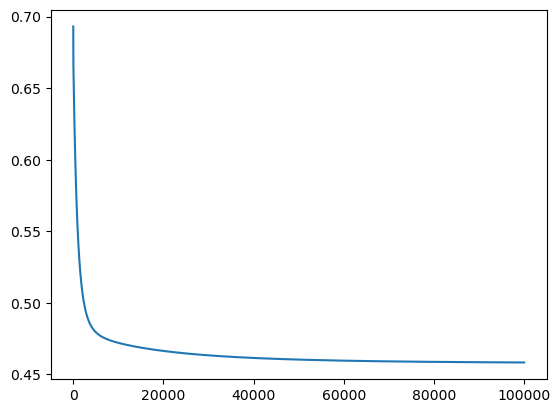

In [9]:
#Implementing Logisting Regression for the given data

titanic = Logistic_regression(lr = 0.01, n_itr = 100000)
titanic.fit_model(X_train, y_train)

#Plotting the cost values
plt.plot(range(titanic.n_itr), titanic.cost_values)

print('Final cost value = ', titanic.cost_values[-1])



In [13]:
# Predictions
Predicted_prob = titanic.f_wb(X_test)
My_Predictions = []

threshhold = 0.53

for p in Predicted_prob:
    if p > threshhold:
        My_Predictions.append(1)
    else:
        My_Predictions.append(0)

print('\nDisplaying first 10 samples side by side ~\n')
print('Actual Survival \t Prediction \t Probability \n')
total = len(My_Predictions)
for i in range(10):
    print('\t', y_test[i], '\t\t  ', My_Predictions[i],
          '\t\t', Predicted_prob[i], '\n')



Displaying first 10 samples side by side ~

Actual Survival 	 Prediction 	 Probability 

	 1 		   1 		 0.8240579598774828 

	 1 		   1 		 0.8863048414822201 

	 0 		   0 		 0.15387295515408211 

	 0 		   0 		 0.4702052507921255 

	 0 		   0 		 0.18217794194165168 

	 1 		   1 		 0.9541459378296049 

	 0 		   0 		 0.18660640385800728 

	 1 		   0 		 0.21540210706295704 

	 0 		   0 		 0.1554590425054814 

	 0 		   0 		 0.1554590425054814 



In [11]:
# Calculating a few parameters to analyze teh model
f_nve, f_pve, t_nve, t_pve = np.zeros(4)
for i in range(total):
    
    if (My_Predictions[i] == 0):

        if (y_test[i] == 1):
            f_nve += 1
        else:
            t_nve += 1

    else:
        if (y_test[i] == 1):
            t_pve += 1
        else:
            f_pve += 1

print("Accuracy & Analysis of Model Predictions ~")

print('\n False Posetives = ', f_pve*100/total, '% \t False Negatives = ', f_nve*100/total, '%')
print('\n True Posetives = ', t_pve*100/total, '% \t True Negatives = ', t_nve*100/total, '%')

#Calculating Accuarcy of the model
accuracy = 1 - ((np.sum(np.abs(y_test - My_Predictions))) / (len(My_Predictions)))
print("\033[1m" + f"\n Accuracy = {accuracy*100} %" + "\033[0m")

Accuracy & Analysis of Model Predictions ~

 False Posetives =  6.451612903225806 % 	 False Negatives =  12.258064516129032 %

 True Posetives =  24.193548387096776 % 	 True Negatives =  57.096774193548384 %

 Accuracy = 81.29032258064515 %
